In [10]:
# Importamos las librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar y preparar los datos
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTDx2deUjDJ6kbKMnSuLzMSsVnv5VbqSMHQlOba8xYFRlyX8zCJN1ehrQZS1a9MAMzIN_MVWVQmBmH-/pub?output=csv"
data = pd.read_csv(url)

# Ver las primeras filas para entender la estructura
data.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 6:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 7:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 8:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [11]:
# 2. Limpieza de datos
# Eliminar filas con valores nulos
data = data.dropna()

# Seleccionar características relevantes para el modelo
features = ['Source Port', 'Destination Port', 'Protocol', 'Packet Length',
           'Anomaly Scores', 'Severity Level']
target = 'Attack Type'

# Convertir variables categóricas
le = LabelEncoder()
data['Protocol'] = le.fit_transform(data['Protocol'])
data['Severity Level'] = le.fit_transform(data['Severity Level'])  # Convertir 'Severity Level' en numérico
y = le.fit_transform(data[target])

# Preparar características
X = data[features].values

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 4. Definir el modelo de red neuronal
def create_model(input_shape, num_classes):
    model = models.Sequential([
        # Capa de entrada
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dropout(0.3),

        # Primera capa oculta
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),

        # Segunda capa oculta
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),

        # Capa de salida
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [14]:
# 5. Compilar y entrenar el modelo
num_classes = len(np.unique(y))
model = create_model((X_train.shape[1],), num_classes)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50


/home/matias/python/my_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3215 - loss: 1.1391 - val_accuracy: 0.3535 - val_loss: 1.0986
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3588 - loss: 1.1004 - val_accuracy: 0.3788 - val_loss: 1.0986
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3448 - loss: 1.0976 - val_accuracy: 0.3687 - val_loss: 1.0977
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3585 - loss: 1.0988 - val_accuracy: 0.3586 - val_loss: 1.0986
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3585 - loss: 1.0864 - val_accuracy: 0.3889 - val_loss: 1.0952
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3928 - loss: 1.0883 - val_accuracy: 0.3737 - val_loss: 1.0965
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3862 - loss: 1.0883 - val_accuracy: 0.3636 - val_loss: 1.0986
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3872 - loss: 1.0746 - val_accuracy: 0.3485 - val_loss: 1.1035
Ep

In [15]:
# 6. Evaluar el modelo
# Evaluación en conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'\nPrecisión en el conjunto de prueba: {test_accuracy:.4f}')

# Generar predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3068 - loss: 1.1422

Precisión en el conjunto de prueba: 0.3306
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


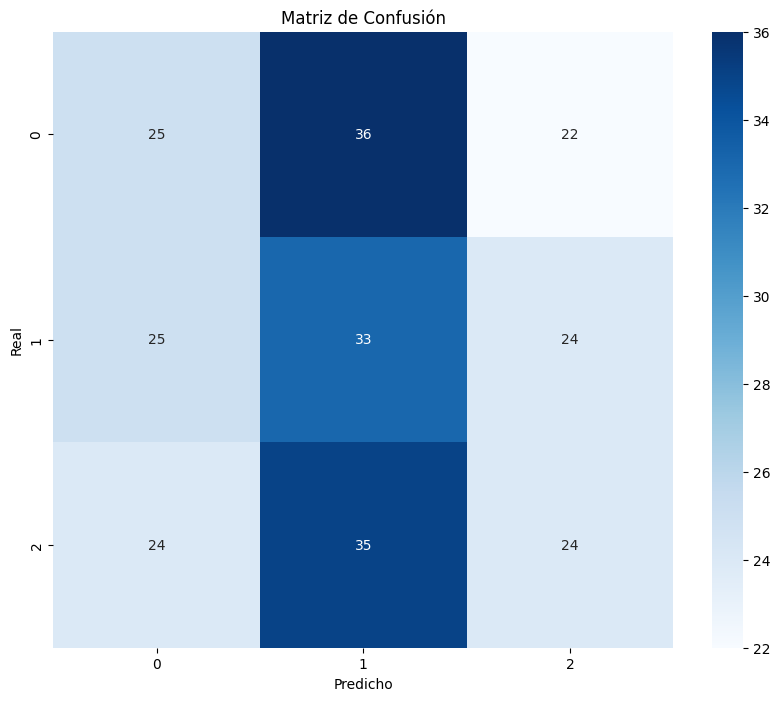

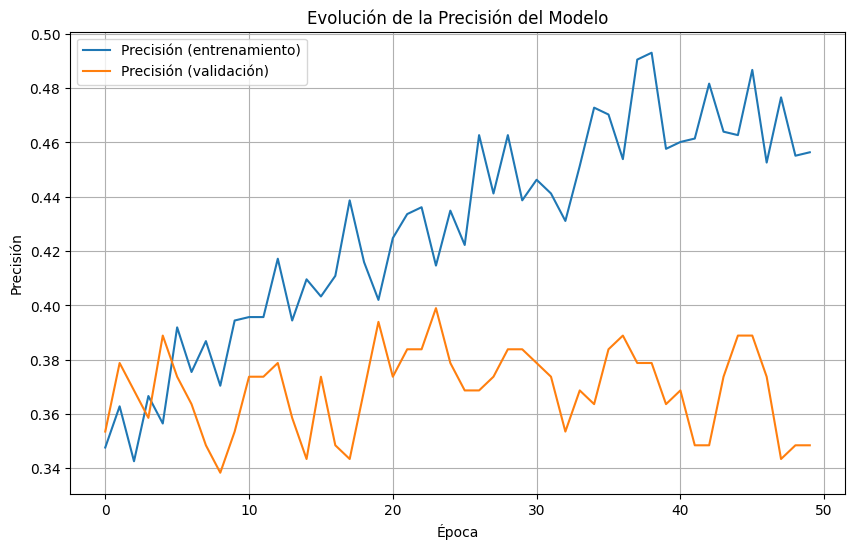


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.34      0.30      0.32        83
           1       0.32      0.40      0.35        82
           2       0.34      0.29      0.31        83

    accuracy                           0.33       248
   macro avg       0.33      0.33      0.33       248
weighted avg       0.33      0.33      0.33       248



In [16]:
# 7. Visualizar resultados
# Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Gráfico de la precisión durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.title('Evolución de la Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir reporte de clasificación
print('\nReporte de Clasificación:')
print(classification_report(y_test, y_pred_classes))

In [17]:
# 8. Función para realizar predicciones
def predict_attack(model, scaler, le, input_data):
    # Normalizar los datos de entrada
    input_scaled = scaler.transform([input_data])

    # Realizar predicción
    prediction = model.predict(input_scaled)
    predicted_class = np.argmax(prediction)

    # Convertir la predicción a la etiqueta original
    attack_type = le.inverse_transform([predicted_class])[0]
    confidence = np.max(prediction) * 100

    return attack_type, confidence

In [18]:
# Ejemplo de uso para predicción
sample_input = [80, 443, 1, 1500, 0.8, 3]  # Ejemplo de datos de entrada
attack_type, confidence = predict_attack(model, scaler, le, sample_input)
print(f'\nPredicción de ejemplo:')
print(f'Tipo de ataque: {attack_type}')
print(f'Confianza: {confidence:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Predicción de ejemplo:
Tipo de ataque: DDoS
Confianza: 56.46%
